# 📥 Visualizing correlated Gaussian distributions

A multivariate Gaussian distribution for $N$ dimensional $\boldsymbol{x} = \{x_1, \ldots, x_N\}$ with $\boldsymbol{\mu} = \{\mu_1, \ldots, \mu_N\}$, with positive-definite *covariance matrix* $\Sigma$ is 

$$
  p(\boldsymbol{x}|\boldsymbol{\mu},\Sigma) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}
    e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^\intercal\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}
$$

For the one dimensional case, it reduces to the familiar

$$
  p(x_1|\mu_1,\sigma_1) = \frac{1}{\sqrt{2\pi\sigma_1^2}}
    e^{-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}}
$$

with $\Sigma = \sigma_1^2$.

For the bivariate case (two dimensional), 

$$
  \boldsymbol{x} = \pmatrix{x_1\\ x_2} \quad\mbox{and}\quad
  \boldsymbol{\mu} = \pmatrix{\mu_1\\ \mu_2} \quad\mbox{and}\quad
  \Sigma = \pmatrix{\sigma_1^2 & \rho_{12} \sigma_1\sigma_2 \\
                    \rho_{12}\sigma_1\sigma_2 & \sigma_2^2}
        \quad\mbox{with}\ 0 < \rho_{12}^2 < 1            
$$

and $\Sigma$ is positive definite.


**Questions to consider:**

1. *What does "positive definite" mean and why is this a requirement for the covariance matrix $\Sigma$?*
<br>
Eigenvalues are all positive, and for now the covariance matrix is just an identity matrix
1. *What is plotted in each part of the graph (called a "corner plot")?*
<br>
The top and bottom right plots show just the distributions of the individual variables, and the bottom left, touhing both plots, shows a scatter plot of all the individual points
1. *What effect does changing $\mu_1$ (`mu1`) or $\mu_2$ (`mu2`) have?*
<br>
Shifts the plot
1. *What effect does changing $\sigma_1$ (`var1`) or $\sigma_2$ (`var2`) have? What if the scales for $x_1$ and $x_2$ were the same?*
<br>
Width of the plot is changed, making it eliptical
1. *What happens if $\rho_{12}$ (`rho`) is equal to $0$ then $+0.5$ then $-0.5$.*
<br>
It approaches a line, that it will fit to.
1. *What happens if $\rho_{12}$ (`rho`) is $>1$ or $< -1$? Explain what goes wrong.*
<br>
Covariance matrix is no longer positive definite, you need the square root of a 
1. *So what characterizes independent (uncorrelated) variables versus positively correlated versus negatively correlated?*
<br>
An eliptical distribution with the primary axes being parallel with the axes of the variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
def plot_bivariate_gaussians(mu1, mu2, var1, var2, rho, samples=100000):
    """
    Generates and plots samples from a 2D correlated Gaussian distribution 
    (also known as a bivariate normal distribution).
    
    Args:
        mu1 (float): Mean of the first dimension.
        mu2 (float): Mean of the second dimension.
        var1 (float): Variance of the first dimension.
        var2 (float): Variance of the second dimension.
        rho (float): Correlation coefficient between the dimensions.
    """
    # Create the mean vector and covariance matrix
    mean = np.array([mu1, mu2])
    cov = np.array([
        [var1, rho * np.sqrt(var1 * var2)],
        [rho * np.sqrt(var1 * var2), var2]
    ])

    # Generate samples from the multivariate normal distribution
    try:
        samples = np.random.multivariate_normal(mean, cov, size=samples)
    except np.linalg.LinAlgError:
        print("Invalid covariance matrix. Ensure `var1` and `var2` are positive.")
        return

    # Create the corner plot
    fig = corner.corner(samples, labels=[r'$x_1$', r'$x_2$'], 
                        quantiles=[0.16, 0.5, 0.84], 
                        show_titles=True, 
                        label_kwargs={"fontsize": 14},
                        title_kwargs={"fontsize": 14})
    # Adjust the fonts for the tick labels
    for ax in fig.get_axes():
      ax.tick_params(axis='both', labelsize=14)
    
    # Update the title with the current parameters
    fig.suptitle(
        f"Bivariate Gaussian\n$\mu$=[{mu1}, {mu2}], $\Sigma_{{11}}$={var1}, $\Sigma_{{22}}$={var2}, $\\rho$={rho}", 
        y=1.1)
    plt.show()

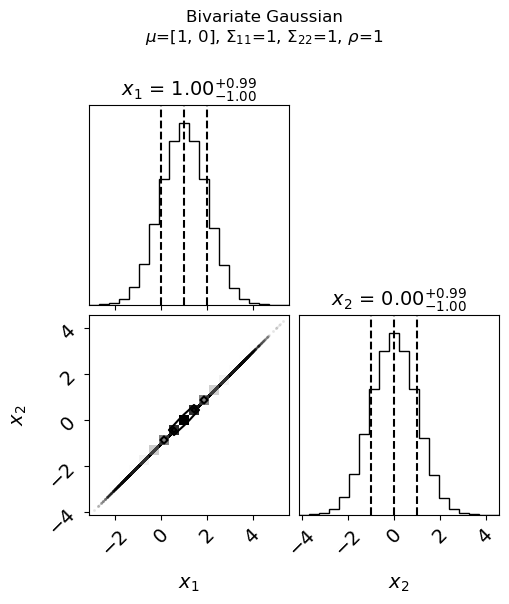

In [13]:
mu1 = 1
mu2 = 0
var1 = 1
var2 = 1
rho = 1

plot_bivariate_gaussians(mu1, mu2, var1, var2, rho)